In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sympy as sym
import urllib.request
import wget
import os
import os.path as path

In [2]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/DatosI5.txt'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'


if not path.exists(file):
    Path_ = wget.download(url,file)
    
else:
    Path_ = file

In [3]:
data = np.loadtxt(file, skiprows=1,delimiter=',')

In [4]:
X=data[:,0]
Y=data[:,1]

In [5]:
p=[1]
x=sym.Symbol('x')
for i in range(len(X)):
    p.append(p[i]*(x-X[i]))
pl=[]
for i in range(len(p)):
    pl.append(sym.lambdify(x,p[i]))

In [6]:
a=[]
for i in range(len(X)):
    if i==0:
        a.append(Y[i])
    else:
        res=Y[i]
        for j in range(i):
            res-=a[j]*pl[j](X[i])
        res/=pl[i](X[i])
        a.append(res)

In [7]:
poly=0
for i in range(len(a)):
    poly+=a[i]*p[i]
poly=sym.lambdify(x,poly)

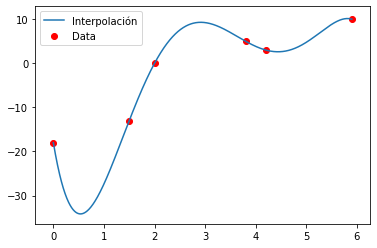

In [8]:
x=np.linspace(X[0],X[-1],1000)
y=poly(x)
plt.plot(x,y,label='Interpolación')
plt.scatter(X,Y,color='r',label='Data')
plt.legend()